### Truncated SVD

In [1]:
from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread
from skimage import img_as_float
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
def trancated_svd(image,k):
    U,s,V = svd(image,full_matrices=False)
    #Mnew = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    Mnew = np.dot(U[:,k:],np.dot(np.diag(s[k:]),V[k:,:]))
    return Mnew,s

### Function for getting a picture from a url

In [2]:
from urllib.request import urlopen
from io import BytesIO
from PIL import Image
from skimage import io
def get_image(url):

    response = urlopen(url)
    buf = BytesIO(response.read())
    im = Image.open(buf)
    a = io.Image(im)
    return a

#### Function for using TruncatedSVD for image compressing

In [3]:

def compress_show_gray_images(image,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    original_shape = image.shape
    new_img,s = trancated_svd(image,k)
    fig,axes = plt.subplots(1,3,figsize=(10,4))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].imshow(image, cmap='gray')
    axes[2].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[2].imshow(new_img,cmap='gray')
    axes[2].axis('off')
    fig.tight_layout()

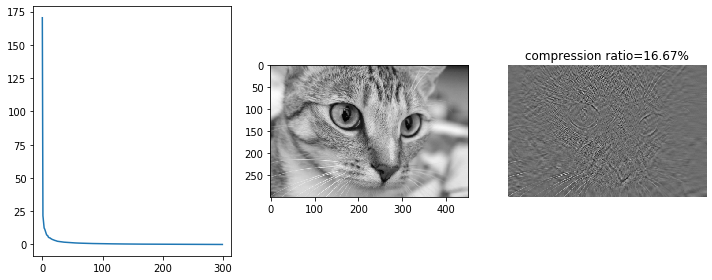

In [8]:
compress_show_gray_images(rgb2gray(data.chelsea()), 30)
#compress_show_gray_images(imread("https://www.cesam.uliege.be/upload/docs/image/png/2017-02/ghosez.png.associated/th-250x250-ghosez.png.jpg", as_gray=True),
#                        3)